# pytorchのサンプルコード

https://ya6mablog.com/pytorch-mnist-nlp/

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [24]:
# 前処理
transform = transforms.Compose([
    # 画像をTensorに変換してくれる
    # チャネルラストをチャネルファーストに
    # 0〜255の整数値を0.0〜1.0の浮動少数点に変換してくれる
    transforms.ToTensor()                              
])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

In [25]:
num_batches = 100

In [26]:
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)

In [27]:
train_iter = iter(train_dataloader)

In [28]:
train_iter

In [29]:
# 100個だけミニバッチからデータをロードする
imgs, labels = train_iter.next()

In [30]:
# 100個のデータ, グレースケール, 28px, 28px
imgs.size()

torch.Size([100, 1, 28, 28])

In [31]:
labels

tensor([1, 1, 8, 5, 0, 2, 8, 8, 4, 5, 6, 7, 2, 4, 7, 4, 5, 2, 9, 1, 5, 9, 8, 9,
        3, 7, 1, 5, 0, 1, 6, 4, 7, 3, 5, 7, 1, 5, 3, 4, 8, 0, 5, 7, 9, 7, 7, 7,
        9, 1, 3, 8, 0, 4, 4, 6, 5, 9, 3, 1, 8, 6, 2, 1, 8, 3, 7, 1, 6, 9, 8, 9,
        4, 0, 6, 3, 5, 2, 1, 6, 1, 5, 2, 0, 5, 7, 7, 7, 0, 7, 6, 2, 2, 6, 9, 0,
        1, 0, 1, 5])

In [32]:
img = imgs[0]

In [33]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [34]:
# 画像データを表示するために、チャネルファーストのデータをチャネルラストに変換する
img_permute = img.permute(1, 2, 0)

In [35]:
img_permute

tensor([[[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000]],

        [[0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [

<AxesSubplot:>

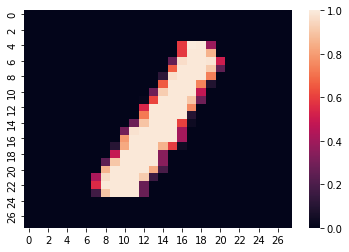

In [36]:
# tensorから2次元のarrayに変換する
sns.heatmap(img_permute.numpy()[:, :, 0])

In [37]:
labels[0]

tensor(1)

In [38]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            # 第1引数：input
            # 第2引数：output
            nn.Linear(28 * 28, 400),
            # メモリを節約出来る
            nn.ReLU(inplace=True),
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        output = self.classifier(x)
        return output

In [39]:
model = MLP()

In [40]:
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [42]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        # dim=1 => 0-9の分類方向のMax値を返す
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    # 600回分で割る
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))

epoch: 0, loss: 0.3108065725925068, acc: 0.9080503582954407
epoch: 1, loss: 0.10855879344511778, acc: 0.9672998785972595
epoch: 2, loss: 0.07127433849188189, acc: 0.977349042892456
epoch: 3, loss: 0.052727836191964646, acc: 0.983298659324646
epoch: 4, loss: 0.039225662271492184, acc: 0.9871150851249695
epoch: 5, loss: 0.0317899618226996, acc: 0.9894484281539917
epoch: 6, loss: 0.023320492262331148, acc: 0.992415189743042
epoch: 7, loss: 0.021702747221812993, acc: 0.9928315281867981
epoch: 8, loss: 0.01804732890726882, acc: 0.9939321875572205
epoch: 9, loss: 0.016296897172184497, acc: 0.9945822954177856
epoch: 10, loss: 0.014395903408682595, acc: 0.9950986504554749
epoch: 11, loss: 0.014498312981498505, acc: 0.9952155351638794
epoch: 12, loss: 0.01183299979261695, acc: 0.9960489869117737
epoch: 13, loss: 0.014223367236269647, acc: 0.9953153729438782
epoch: 14, loss: 0.007928785064890084, acc: 0.9974657297134399


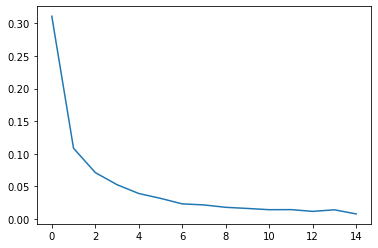

In [43]:
plt.plot(losses)

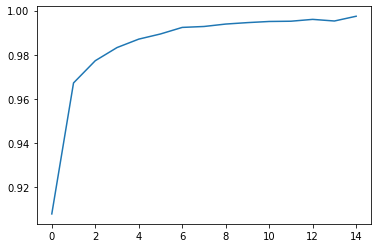

In [44]:
plt.plot(accs)

In [45]:
train_iter = iter(train_dataloader)

In [46]:
imgs, labels = train_iter.next()

In [47]:
labels

tensor([5, 9, 2, 0, 5, 4, 0, 6, 4, 9, 9, 4, 3, 5, 8, 1, 9, 8, 8, 8, 3, 9, 7, 1,
        6, 6, 7, 8, 2, 7, 8, 9, 5, 2, 8, 7, 7, 1, 8, 4, 3, 0, 4, 3, 1, 6, 2, 9,
        7, 7, 7, 9, 4, 9, 3, 2, 0, 7, 5, 4, 9, 3, 5, 3, 0, 9, 3, 9, 7, 8, 4, 6,
        4, 1, 7, 1, 0, 1, 0, 1, 5, 7, 3, 2, 2, 9, 7, 7, 0, 4, 6, 8, 1, 0, 1, 1,
        3, 2, 1, 6])

In [48]:
imgs_gpu = imgs.view(100, -1).to(device)
output= model(imgs_gpu)

In [49]:
pred = torch.argmax(output, dim=1)

In [50]:
pred

tensor([5, 9, 2, 0, 5, 4, 0, 6, 4, 9, 9, 4, 3, 5, 8, 1, 9, 8, 8, 8, 3, 9, 7, 1,
        6, 6, 7, 8, 2, 7, 8, 9, 5, 2, 8, 7, 7, 1, 8, 4, 3, 0, 4, 3, 1, 6, 2, 9,
        7, 7, 7, 9, 4, 9, 3, 2, 0, 7, 5, 4, 9, 3, 5, 3, 0, 9, 3, 9, 7, 8, 4, 6,
        4, 1, 7, 1, 0, 1, 0, 1, 5, 7, 3, 2, 2, 9, 7, 7, 0, 4, 6, 8, 1, 0, 1, 1,
        3, 2, 1, 6])